<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_20_Bubble_Plots_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [25]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-12-08 23:35:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  74.3MB/s    in 2.0s    

2025-12-08 23:35:03 (74.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#**STEP 0: CLEANING AND PREPPING**

In [19]:
# --- Age bucket + AgeMid ---

df["Age"] = df["Age"].astype(str).str.strip()

# Map Age text to buckets using regex (robust to small changes)
df["AgeBucket"] = df["Age"].replace({
    r"Under 18.*": "Under 18",
    r"18.*24.*": "18-24",
    r"25.*34.*": "25-34",
    r"35.*44.*": "35-44",
    r"45.*54.*": "45-54",
    r"55.*64.*": "55-64",
    r"65.*": "65+"
}, regex=True)

age_order = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["AgeBucket"] = pd.Categorical(df["AgeBucket"], categories=age_order, ordered=True)

# Numeric midpoints for age (for plotting and bubble size)
age_mid_map = {
    "Under 18": 16,
    "18-24": 21,
    "25-34": 29,
    "35-44": 39,
    "45-54": 49,
    "55-64": 59,
    "65+": 70
}

df["AgeMid"] = df["AgeBucket"].map(age_mid_map)

print("Unique AgeBucket:", df["AgeBucket"].unique())
print("Unique AgeMid:", df["AgeMid"].unique())


# --- Clean compensation column (remove extreme outliers) ---

comp = df["ConvertedCompYearly"].dropna()
q1, q3 = comp.quantile([0.25, 0.75])
iqr = q3 - q1
low_bound = q1 - 1.5 * iqr
high_bound = q3 + 1.5 * iqr

df_comp_clean = df[
    (df["ConvertedCompYearly"].notna()) &
    (df["ConvertedCompYearly"] >= low_bound) &
    (df["ConvertedCompYearly"] <= high_bound)
].copy()

print("Rows in original df:", len(df))
print("Rows in comp-clean df:", len(df_comp_clean))


Unique AgeBucket: ['Under 18', '35-44', '45-54', '18-24', '25-34', '55-64', NaN, '65+']
Categories (7, object): ['Under 18' < '18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']
Unique AgeMid: [16, 39, 49, 21, 29, 59, NaN, 70]
Categories (7, int64): [16 < 21 < 29 < 39 < 49 < 59 < 70]
Rows in original df: 65437
Rows in comp-clean df: 22457


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


/tmp/ipython-input-1873165909.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t1_1.groupby(["AgeBucket", "SOPartFreq"], as_index=False)


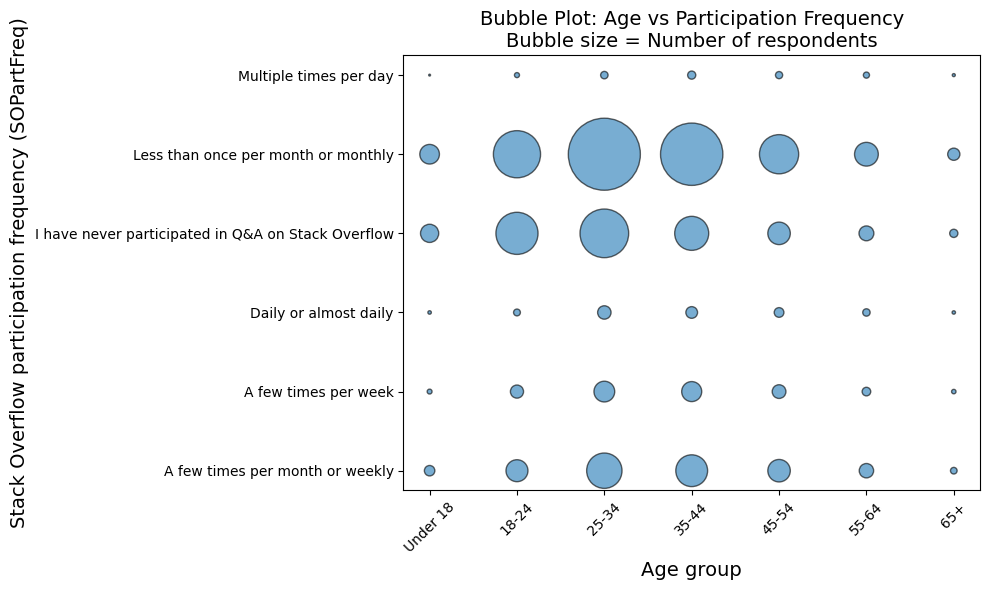

In [20]:
##Write your code here
# Font sizes
plt.rcParams.update({
    'font.size': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.titlesize': 14,
    'axes.labelsize': 14
})

t1_1 = df.dropna(subset=["AgeBucket", "SOPartFreq"]).copy()

# Group by Age + SOPartFreq → count respondents
t1_1_grouped = (
    t1_1.groupby(["AgeBucket", "SOPartFreq"], as_index=False)
        .size()
        .rename(columns={"size": "Count"})
)

# Map categories to numeric axis positions
age_to_x = {age: i for i, age in enumerate(age_order)}

sofreq_categories = sorted(t1_1_grouped["SOPartFreq"].unique())
sofreq_to_y = {freq: i for i, freq in enumerate(sofreq_categories)}

t1_1_grouped["x"] = t1_1_grouped["AgeBucket"].map(age_to_x)
t1_1_grouped["y"] = t1_1_grouped["SOPartFreq"].map(sofreq_to_y)

# Bubble size = number of respondents
size_scale = 0.3
sizes = t1_1_grouped["Count"] * size_scale

plt.figure(figsize=(10, 6))
plt.scatter(
    t1_1_grouped["x"],
    t1_1_grouped["y"],
    s=sizes,
    alpha=0.6,
    edgecolors="black"
)

plt.xticks(list(age_to_x.values()), list(age_to_x.keys()), rotation=45)
plt.yticks(list(sofreq_to_y.values()), list(sofreq_to_y.keys()))
plt.xlabel("Age group")
plt.ylabel("Stack Overflow participation frequency (SOPartFreq)")
plt.title("Bubble Plot: Age vs Participation Frequency\nBubble size = Number of respondents")
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [16]:
##Write your code here
# Task 1.2 – Bubble Plot for Compensation vs Age
# Relationship between yearly compensation and age
# Bubble size = AgeMid (approximate midpoint of age group)

df["ConvertedCompYearly"].head(20)
df["ConvertedCompYearly"].dtype
df["ConvertedCompYearly"].unique()[:20]
df["ConvertedCompYearly"].isna().sum(), len(df)

(np.int64(42002), 65437)

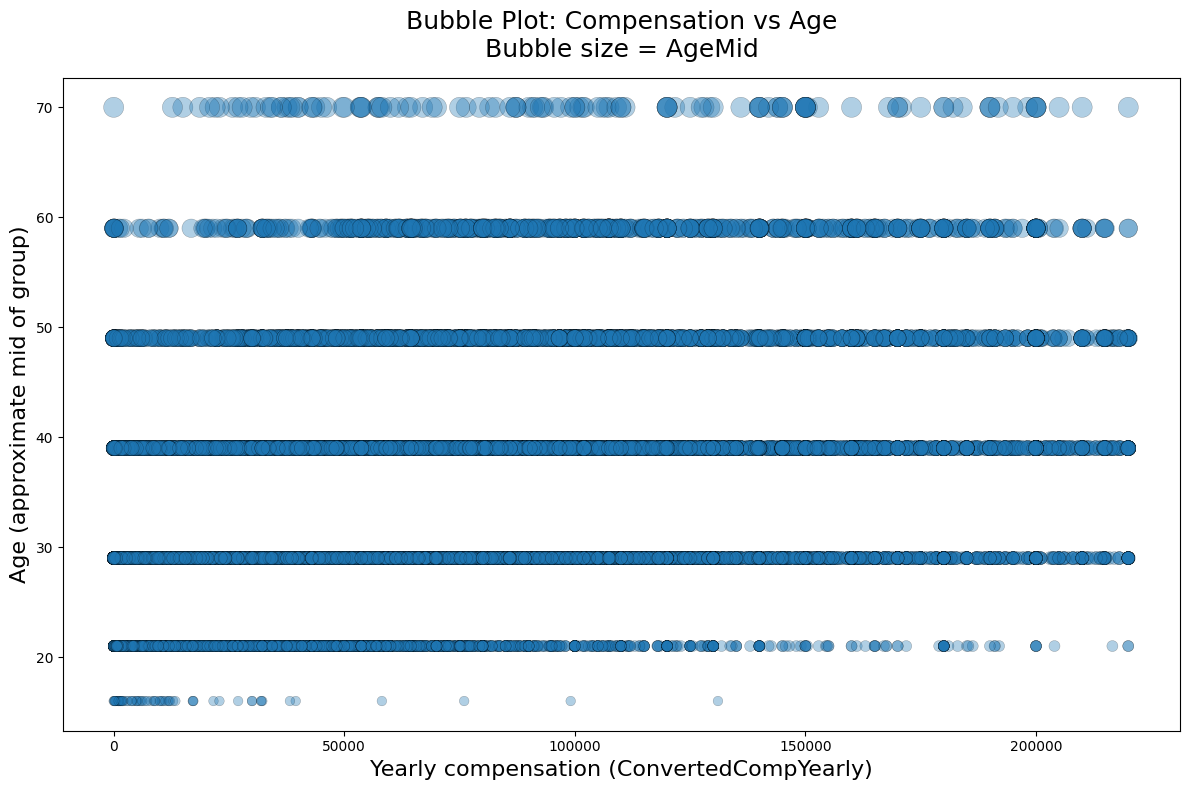

In [23]:
# Task 1.2 – Bubble Plot for Compensation vs Age

t1_2 = df_comp_clean.dropna(subset=["ConvertedCompYearly", "AgeBucket"]).copy()

# Map AgeBucket to numeric midpoints (ensure result is float/int, not Categorical)
age_mid_map = {
    "Under 18": 16,
    "18-24": 21,
    "25-34": 29,
    "35-44": 39,
    "45-54": 49,
    "55-64": 59,
    "65+": 70
}

t1_2["AgeMid_num"] = t1_2["AgeBucket"].astype(str).map(age_mid_map).astype(float)

plt.figure(figsize=(12, 8))

plt.scatter(
    t1_2["ConvertedCompYearly"],
    t1_2["AgeMid_num"],
    s=t1_2["AgeMid_num"] * 3,   # numeric now
    alpha=0.35,
    edgecolors="black",
    linewidth=0.3
)

plt.xlabel("Yearly compensation (ConvertedCompYearly)", fontsize=16)
plt.ylabel("Age (approximate mid of group)", fontsize=16)
plt.title("Bubble Plot: Compensation vs Age\nBubble size = AgeMid", fontsize=18, pad=15)

plt.ticklabel_format(style="plain", axis="x")
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipython-input-1626814709.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t2_1.groupby(["AgeBucket", "Language"], as_index=False)


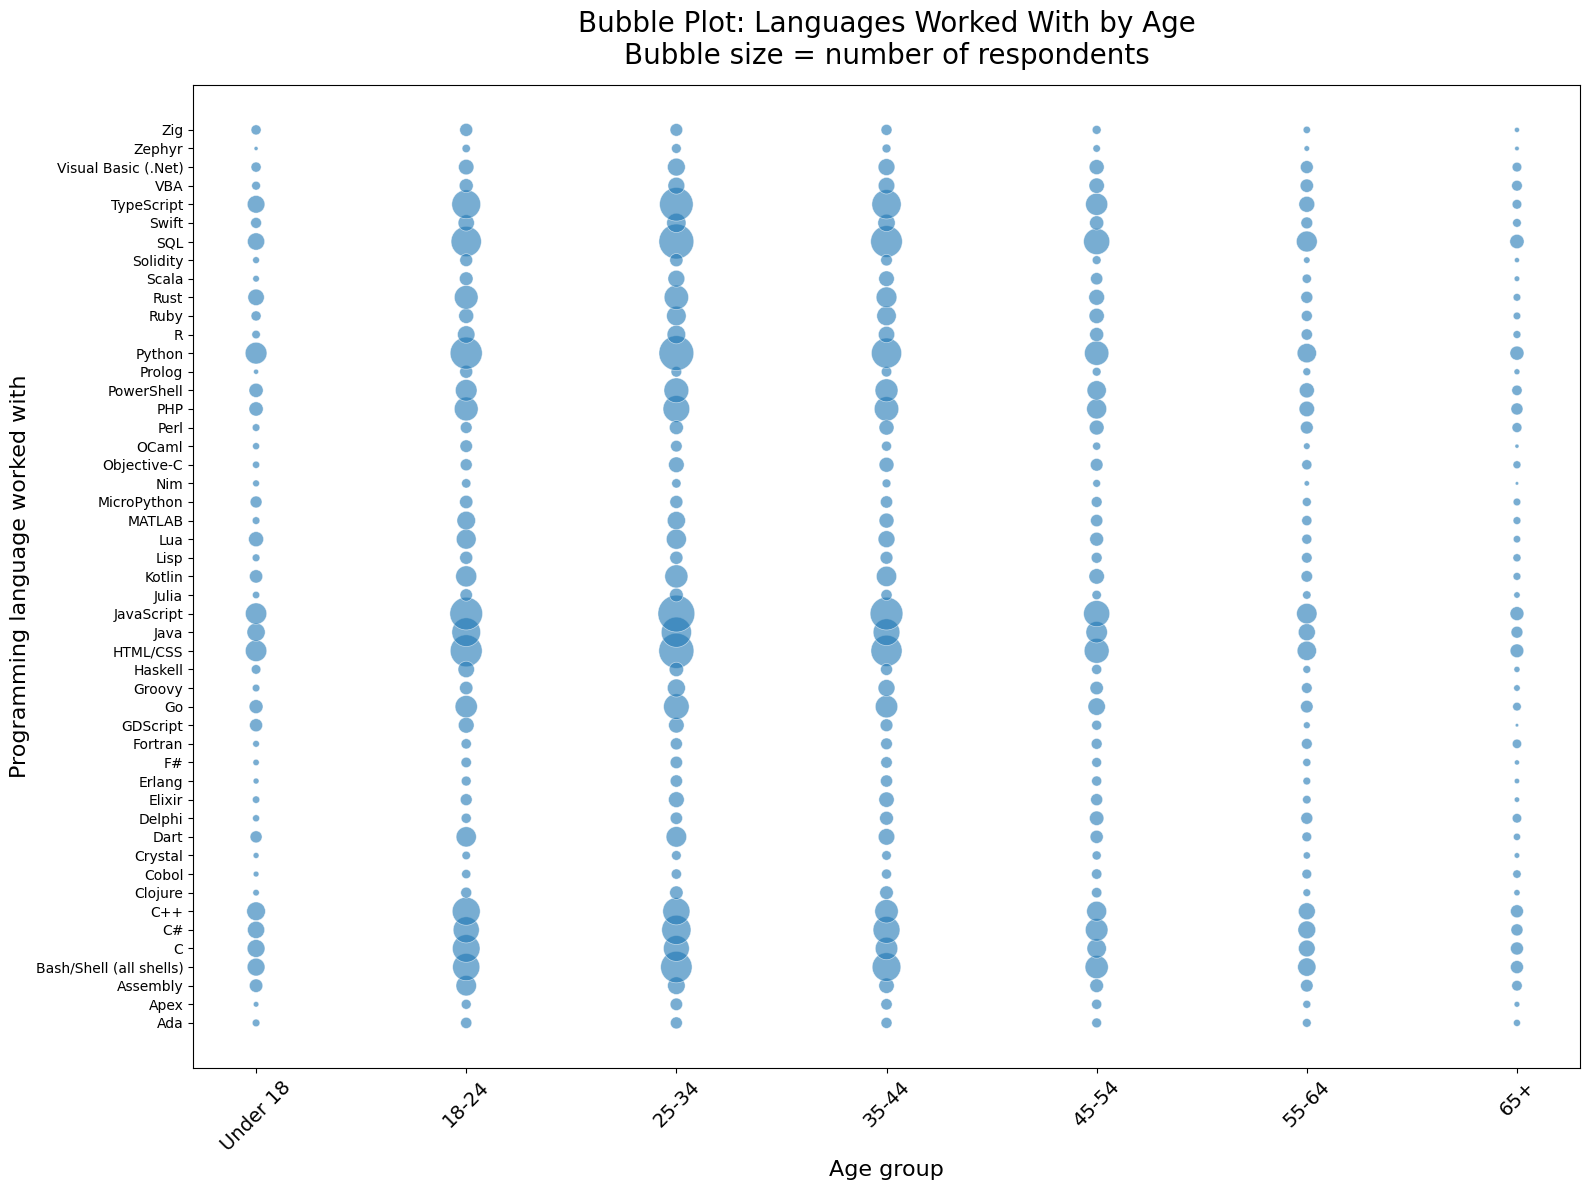

In [30]:
##Write your code here
# Task 2.1 – Bubble Plot of Languages Worked With by Age

t2_1 = df.dropna(subset=["AgeBucket", "LanguageHaveWorkedWith"]).copy()

# Split multi-select column -> explode into rows
t2_1["Language"] = t2_1["LanguageHaveWorkedWith"].str.split(";")
t2_1 = t2_1.explode("Language")

# Clean whitespace and drop empty values
t2_1["Language"] = t2_1["Language"].str.strip()
t2_1 = t2_1[t2_1["Language"] != ""]

# Count per AgeBucket × Language
lang_counts = (
    t2_1.groupby(["AgeBucket", "Language"], as_index=False)
         .size()
         .rename(columns={"size": "Count"})
)

# Map Age to x-axis
age_to_x = {age: i for i, age in enumerate(age_order)}

# Map languages to y-axis
# Clean whitespace to avoid hidden sorting issues
lang_counts["Language"] = lang_counts["Language"].str.strip()

# Sort languages alphabetically A → Z (case-insensitive)
languages = sorted(lang_counts["Language"].unique(), key=lambda x: x.lower())

# Map languages to y-axis positions
lang_to_y = {lang: i for i, lang in enumerate(languages)}

# Apply mapping
lang_counts["y"] = lang_counts["Language"].map(lang_to_y)

lang_counts["x"] = lang_counts["AgeBucket"].map(age_to_x)

# Bubble size = sqrt(count) for readability
sizes = np.sqrt(lang_counts["Count"]) * 6

plt.figure(figsize=(16, 12))
plt.scatter(
    lang_counts["x"],
    lang_counts["y"],
    s=sizes,
    alpha=0.6,
    edgecolors="white",
    linewidth=0.5
)

plt.xticks(list(age_to_x.values()), list(age_to_x.keys()), rotation=45, fontsize=14)
plt.yticks(list(lang_to_y.values()), list(lang_to_y.keys()), fontsize=10)

plt.xlabel("Age group", fontsize=16)
plt.ylabel("Programming language worked with", fontsize=16)
plt.title("Bubble Plot: Languages Worked With by Age\nBubble size = number of respondents",
          fontsize=20, pad=15)

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


/tmp/ipython-input-1023294691.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t2_2.groupby(["AgeBucket", "Database"], as_index=False)


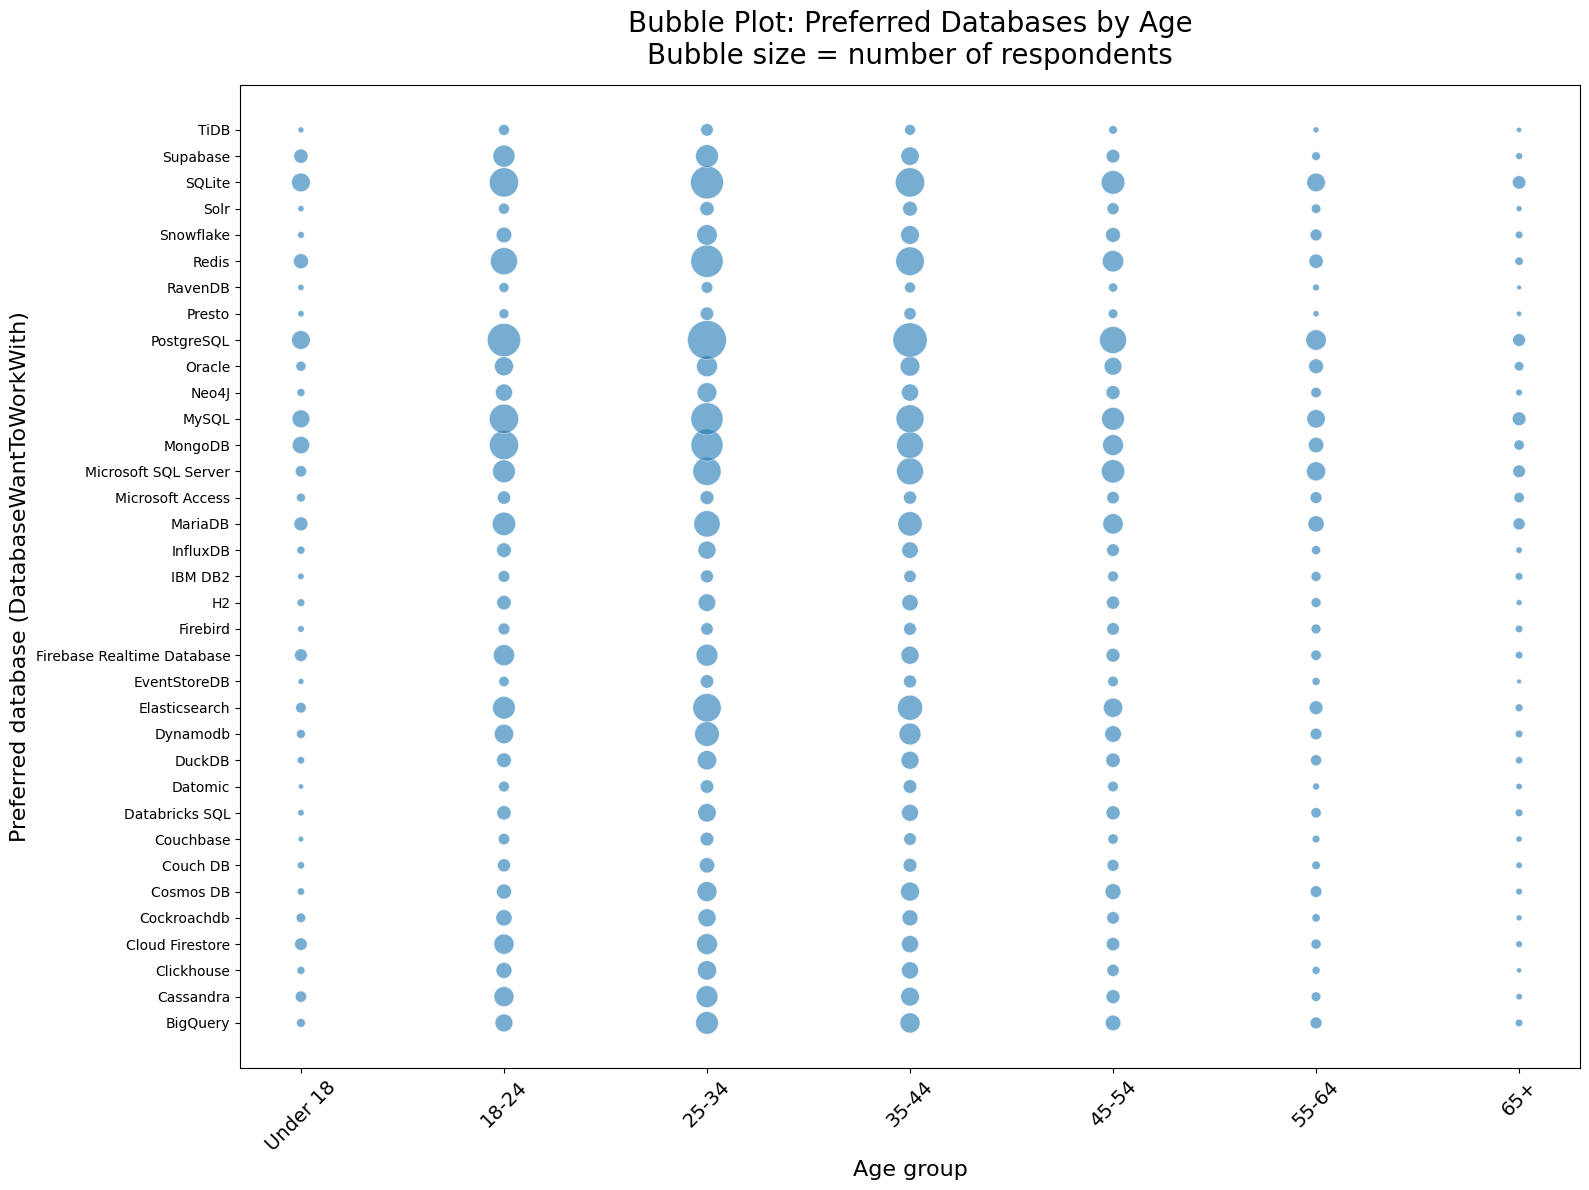

In [31]:
##Write your code here
# Task 2.2 – Bubble Plot for Preferred Databases by Age
# Relationship: Age group × Preferred database
# Bubble size = number of respondents

# Keep rows with AgeBucket and DatabaseWantToWorkWith
t2_2 = df.dropna(subset=["AgeBucket", "DatabaseWantToWorkWith"]).copy()

# Split multi-select column -> explode into one row per database
t2_2["Database"] = t2_2["DatabaseWantToWorkWith"].str.split(";")
t2_2 = t2_2.explode("Database")

# Clean up whitespace and drop empty entries
t2_2["Database"] = t2_2["Database"].str.strip()
t2_2 = t2_2[t2_2["Database"] != ""]

# Count respondents per AgeBucket × Database
db_counts = (
    t2_2.groupby(["AgeBucket", "Database"], as_index=False)
         .size()
         .rename(columns={"size": "Count"})
)

# Map AgeBucket to x-axis
age_to_x = {age: i for i, age in enumerate(age_order)}
db_counts["x"] = db_counts["AgeBucket"].map(age_to_x)

# Map databases to y-axis, sorted A→Z
db_counts["Database"] = db_counts["Database"].str.strip()
databases = sorted(db_counts["Database"].unique(), key=lambda x: x.lower())
db_to_y = {db: i for i, db in enumerate(databases)}
db_counts["y"] = db_counts["Database"].map(db_to_y)

# Bubble size = sqrt(Count) * scale (for readability)
sizes = np.sqrt(db_counts["Count"]) * 8

plt.figure(figsize=(16, 12))
plt.scatter(
    db_counts["x"],
    db_counts["y"],
    s=sizes,
    alpha=0.6,
    edgecolors="white",
    linewidth=0.5
)

plt.xticks(list(age_to_x.values()), list(age_to_x.keys()), rotation=45, fontsize=14)
plt.yticks(list(db_to_y.values()), list(db_to_y.keys()), fontsize=10)

plt.xlabel("Age group", fontsize=16)
plt.ylabel("Preferred database (DatabaseWantToWorkWith)", fontsize=16)
plt.title("Bubble Plot: Preferred Databases by Age\nBubble size = number of respondents",
          fontsize=20, pad=15)

plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [32]:
##Write your code here
[col for col in df.columns if "dev" in col.lower()]


['DevType',
 'AISearchDevHaveWorkedWith',
 'AISearchDevWantToWorkWith',
 'AISearchDevAdmired']

In [33]:
df_comp_clean.shape


(22457, 116)

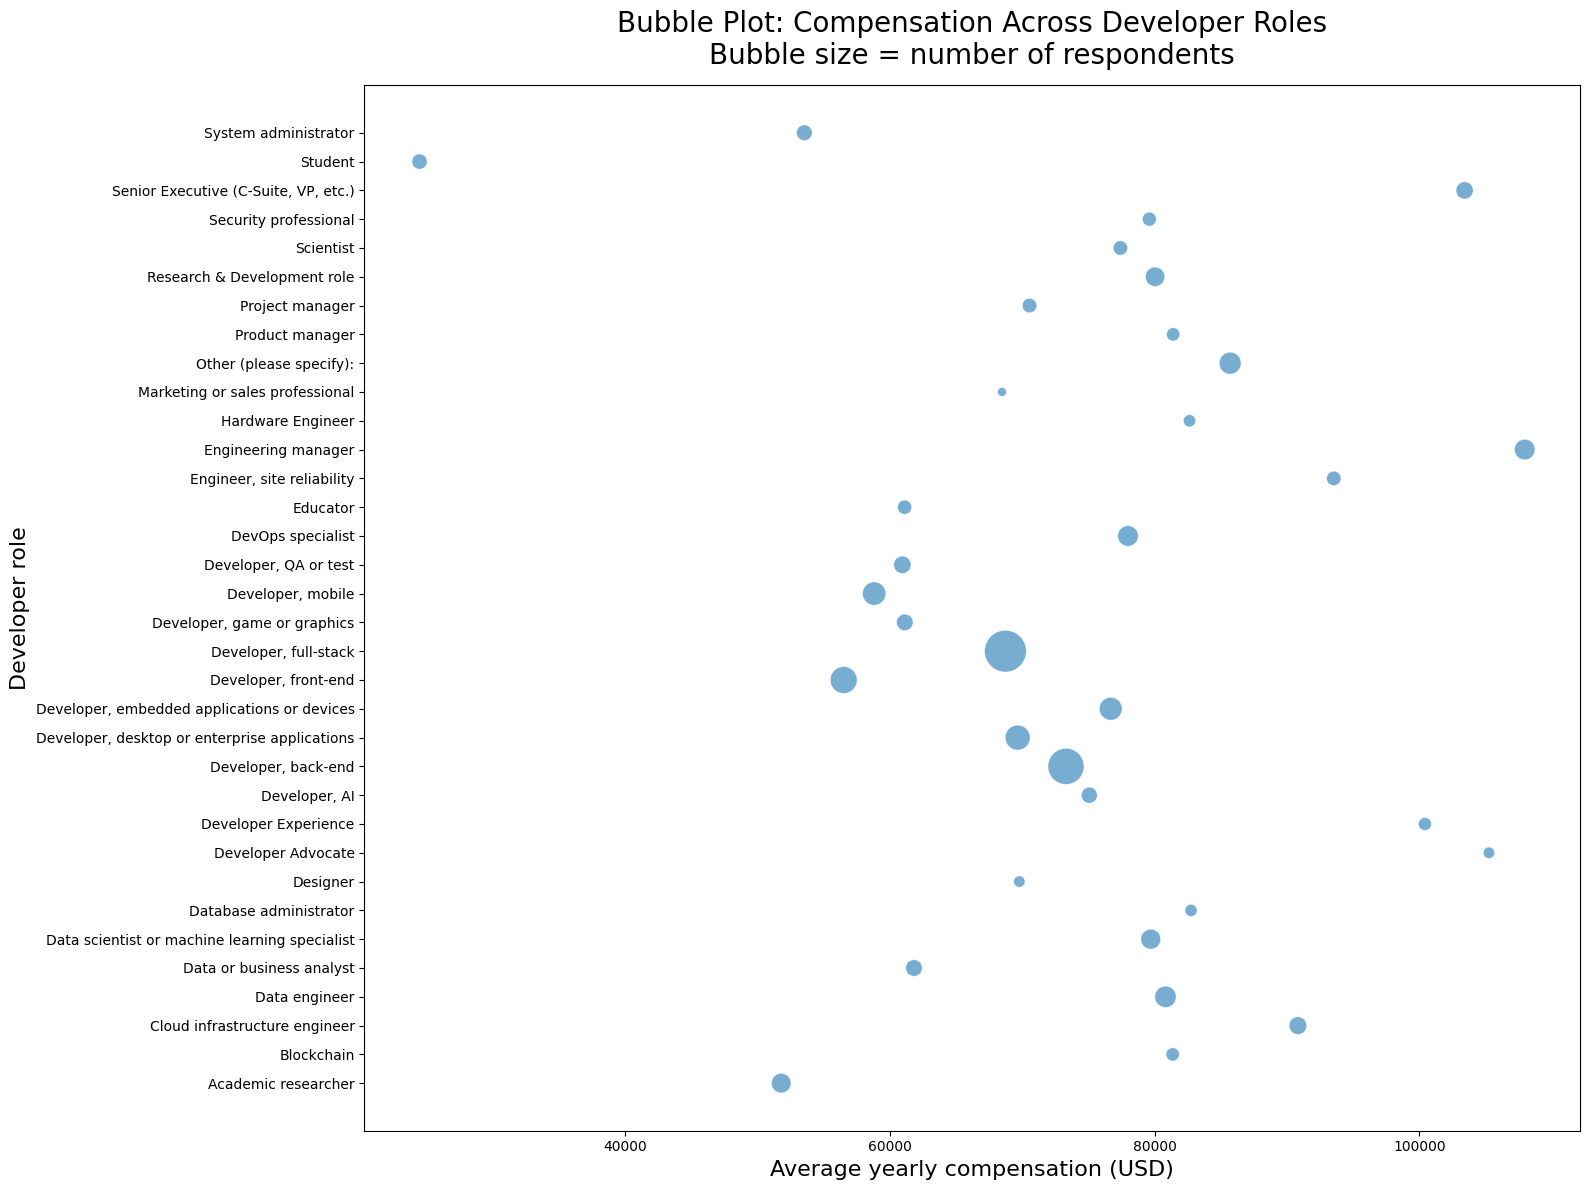

In [34]:
# Task 3.1 – Bubble Plot for Compensation Across Developer Roles

# Keep rows that have compensation and DevType
t3_1 = df_comp_clean.dropna(subset=["ConvertedCompYearly", "DevType"]).copy()

# Split multi-select DevType column
t3_1["Role"] = t3_1["DevType"].str.split(";")
t3_1 = t3_1.explode("Role")

# Clean whitespace and remove empty values
t3_1["Role"] = t3_1["Role"].str.strip()
t3_1 = t3_1[t3_1["Role"] != ""]

# Group: mean compensation + count
role_stats = (
    t3_1.groupby("Role", as_index=False)
        .agg(
            MeanComp=("ConvertedCompYearly", "mean"),
            Count=("ConvertedCompYearly", "count")
        )
)

# Sort roles alphabetically for y-axis
roles = sorted(role_stats["Role"].unique(), key=lambda x: x.lower())
role_to_y = {role: i for i, role in enumerate(roles)}

role_stats["y"] = role_stats["Role"].map(role_to_y)

# Bubble size = sqrt(count) for readability
sizes = np.sqrt(role_stats["Count"]) * 10

plt.figure(figsize=(16, 12))
plt.scatter(
    role_stats["MeanComp"],
    role_stats["y"],
    s=sizes,
    alpha=0.6,
    edgecolors="white",
    linewidth=0.5
)

plt.yticks(list(role_to_y.values()), list(role_to_y.keys()), fontsize=10)
plt.xlabel("Average yearly compensation (USD)", fontsize=16)
plt.ylabel("Developer role", fontsize=16)
plt.title("Bubble Plot: Compensation Across Developer Roles\nBubble size = number of respondents",
          fontsize=20, pad=15)

plt.ticklabel_format(style="plain", axis="x")  # avoid scientific notation
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipython-input-2306508248.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t3_2.groupby(["AgeBucket", "Tool"], as_index=False)


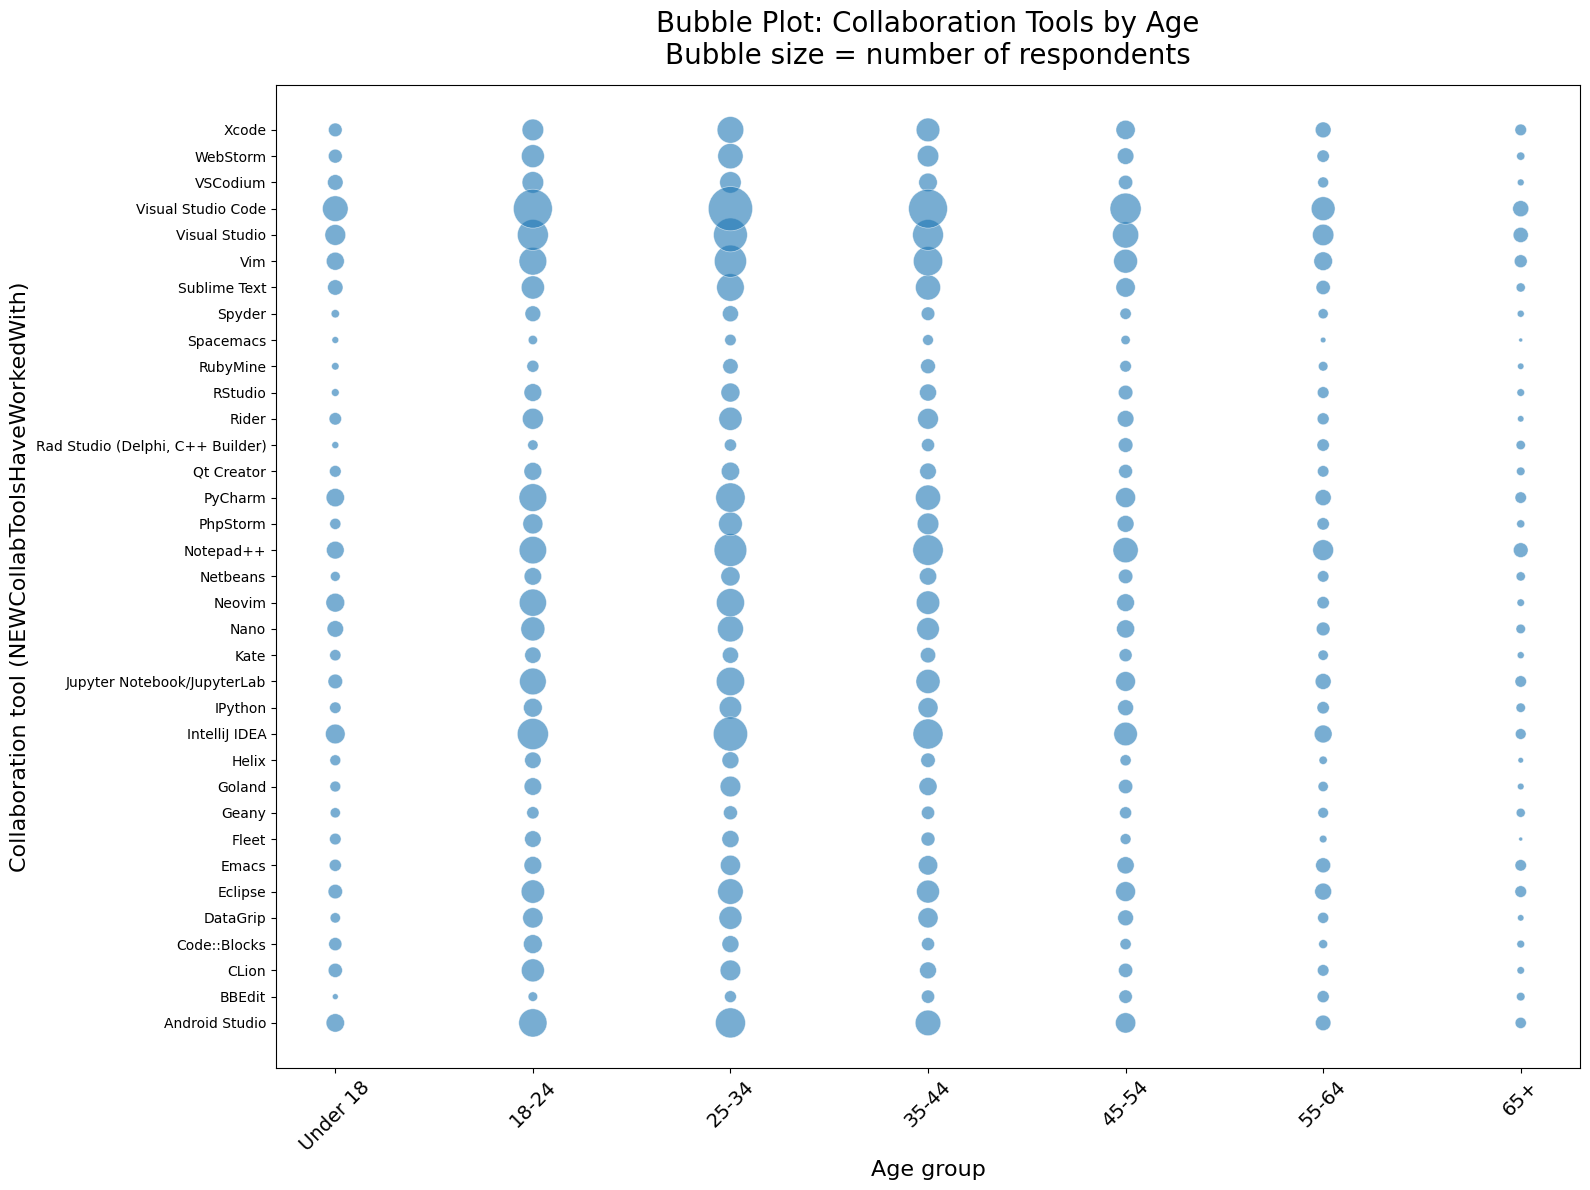

In [35]:
##Write your code here
# Task 3.2 – Bubble Plot for Collaboration Tools by Age
# Relationship: Age group × Collaboration tool
# Bubble size = number of respondents

# Keep rows with AgeBucket and NEWCollabToolsHaveWorkedWith
t3_2 = df.dropna(subset=["AgeBucket", "NEWCollabToolsHaveWorkedWith"]).copy()

# Split multi-select column -> explode
t3_2["Tool"] = t3_2["NEWCollabToolsHaveWorkedWith"].str.split(";")
t3_2 = t3_2.explode("Tool")

# Clean whitespace and drop empty strings
t3_2["Tool"] = t3_2["Tool"].str.strip()
t3_2 = t3_2[t3_2["Tool"] != ""]

# Count respondents per AgeBucket × Tool
tool_counts = (
    t3_2.groupby(["AgeBucket", "Tool"], as_index=False)
        .size()
        .rename(columns={"size": "Count"})
)

# Map AgeBucket to x-axis (reuse age_order from before)
age_to_x = {age: i for i, age in enumerate(age_order)}
tool_counts["x"] = tool_counts["AgeBucket"].map(age_to_x)

# Map tools to y-axis, sorted A→Z
tool_counts["Tool"] = tool_counts["Tool"].str.strip()
tools = sorted(tool_counts["Tool"].unique(), key=lambda x: x.lower())
tool_to_y = {tool: i for i, tool in enumerate(tools)}
tool_counts["y"] = tool_counts["Tool"].map(tool_to_y)

# Bubble size = sqrt(Count) * scale
sizes = np.sqrt(tool_counts["Count"]) * 8

plt.figure(figsize=(16, 12))
plt.scatter(
    tool_counts["x"],
    tool_counts["y"],
    s=sizes,
    alpha=0.6,
    edgecolors="white",
    linewidth=0.5
)

plt.xticks(list(age_to_x.values()), list(age_to_x.keys()), rotation=45, fontsize=14)
plt.yticks(list(tool_to_y.values()), list(tool_to_y.keys()), fontsize=10)

plt.xlabel("Age group", fontsize=16)
plt.ylabel("Collaboration tool (NEWCollabToolsHaveWorkedWith)", fontsize=16)
plt.title("Bubble Plot: Collaboration Tools by Age\nBubble size = number of respondents",
          fontsize=20, pad=15)

plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



/tmp/ipython-input-1615539320.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t4_1.groupby(["AgeBucket", "WebFramework"], as_index=False)


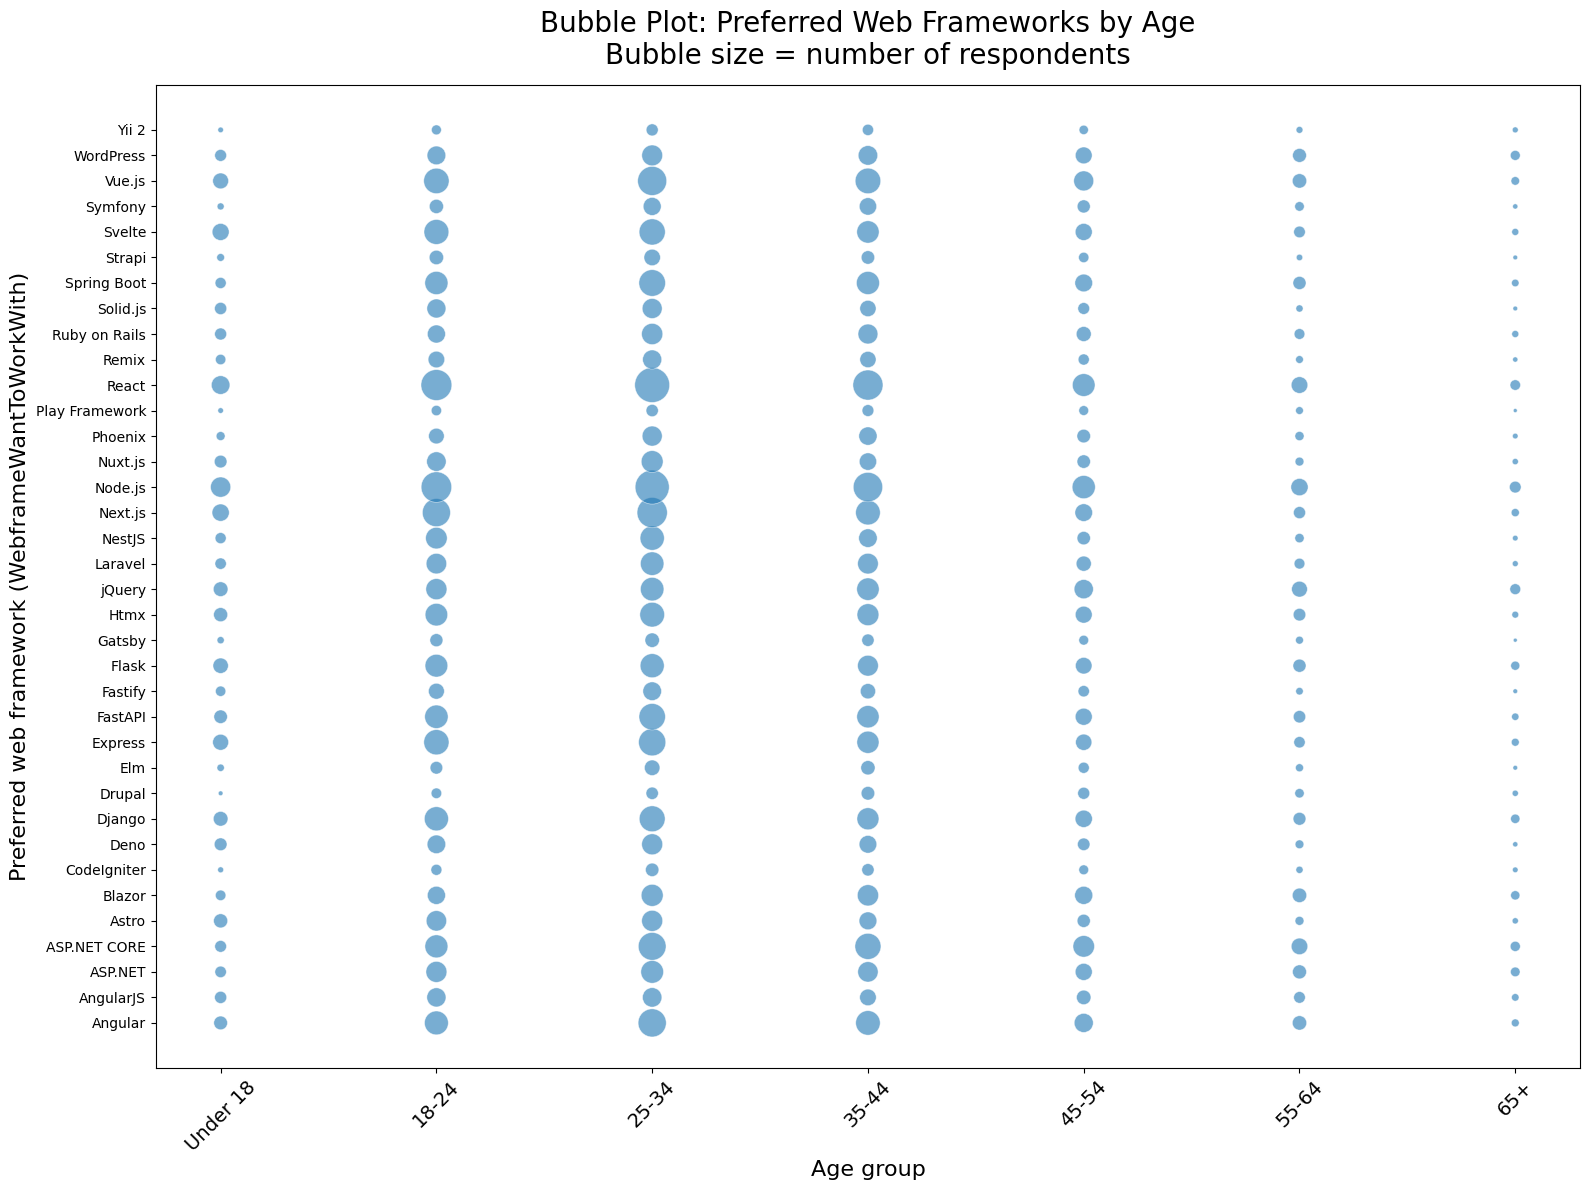

In [36]:
##Write your code here
# Task 4.1 – Bubble Plot for Preferred Web Frameworks vs Age
# Bubble size = number of respondents

# Keep rows that have AgeBucket and WebframeWantToWorkWith
t4_1 = df.dropna(subset=["AgeBucket", "WebframeWantToWorkWith"]).copy()

# Split the multi-select column -> explode
t4_1["WebFramework"] = t4_1["WebframeWantToWorkWith"].str.split(";")
t4_1 = t4_1.explode("WebFramework")

# Clean whitespace and remove blanks
t4_1["WebFramework"] = t4_1["WebFramework"].str.strip()
t4_1 = t4_1[t4_1["WebFramework"] != ""]

# Count respondents per AgeBucket × WebFramework
wf_counts = (
    t4_1.groupby(["AgeBucket", "WebFramework"], as_index=False)
         .size()
         .rename(columns={"size": "Count"})
)

# Map AgeBucket to x-axis (use the same age_order as before)
age_to_x = {age: i for i, age in enumerate(age_order)}
wf_counts["x"] = wf_counts["AgeBucket"].map(age_to_x)

# Map frameworks to y-axis, sorted A→Z
wf_counts["WebFramework"] = wf_counts["WebFramework"].str.strip()
frameworks = sorted(wf_counts["WebFramework"].unique(), key=lambda x: x.lower())
fw_to_y = {fw: i for i, fw in enumerate(frameworks)}
wf_counts["y"] = wf_counts["WebFramework"].map(fw_to_y)

# Bubble size = sqrt(count) * scale
sizes = np.sqrt(wf_counts["Count"]) * 8

plt.figure(figsize=(16, 12))
plt.scatter(
    wf_counts["x"],
    wf_counts["y"],
    s=sizes,
    alpha=0.6,
    edgecolors="white",
    linewidth=0.5
)

plt.xticks(list(age_to_x.values()), list(age_to_x.keys()), rotation=45, fontsize=14)
plt.yticks(list(fw_to_y.values()), list(fw_to_y.keys()), fontsize=10)

plt.xlabel("Age group", fontsize=16)
plt.ylabel("Preferred web framework (WebframeWantToWorkWith)", fontsize=16)
plt.title("Bubble Plot: Preferred Web Frameworks by Age\nBubble size = number of respondents",
          fontsize=20, pad=15)

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



/tmp/ipython-input-1400378963.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t4_2.groupby(['AgeBucket', 'WebframeHaveWorkedWith'], as_index=False)


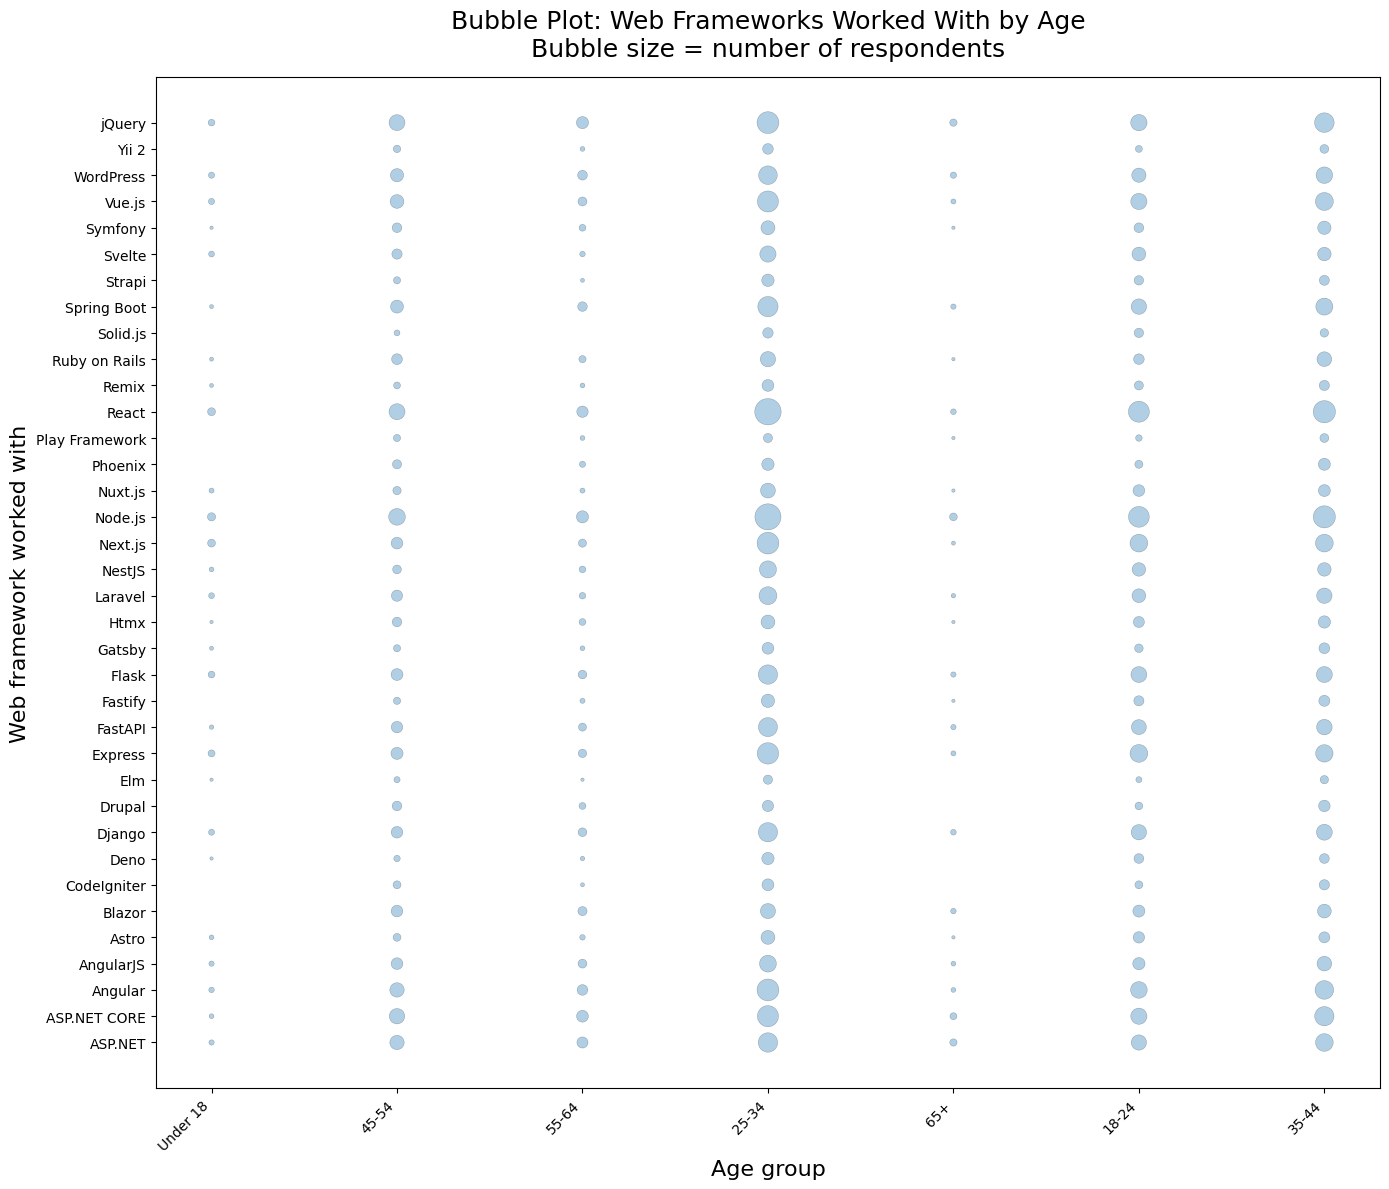

In [38]:
##Write your code here# -------------------------
# Task 4.2 – Web Frameworks Worked With by Age
# -------------------------

# 1. Select the relevant column and drop missing
t4_2 = df_comp_clean[['AgeBucket', 'WebframeHaveWorkedWith']].dropna().copy()

# 2. Split multi-select answers into lists
t4_2['WebframeHaveWorkedWith'] = t4_2['WebframeHaveWorkedWith'].str.split(';')

# 3. Explode into separate rows
t4_2 = t4_2.explode('WebframeHaveWorkedWith')

# 4. Strip whitespace
t4_2['WebframeHaveWorkedWith'] = t4_2['WebframeHaveWorkedWith'].str.strip()

# 5. Remove empty strings
t4_2 = t4_2[t4_2['WebframeHaveWorkedWith'] != ""]

# 6. Group by AgeBucket + Framework
wf_counts = (
    t4_2.groupby(['AgeBucket', 'WebframeHaveWorkedWith'], as_index=False)
        .size()
        .rename(columns={'size':'Count'})
)

# 7. Sort frameworks A→Z for cleaner plot
wf_counts = wf_counts.sort_values('WebframeHaveWorkedWith')

# 8. Bubble sizes (nicer scaling)
sizes = np.sqrt(wf_counts['Count']) * 6

# 9. Plot
plt.figure(figsize=(14, 12))

plt.scatter(
    wf_counts['AgeBucket'],
    wf_counts['WebframeHaveWorkedWith'],
    s=sizes,
    alpha=0.35,
    edgecolors='black',
    linewidth=0.3
)

plt.title("Bubble Plot: Web Frameworks Worked With by Age\nBubble size = number of respondents",
          fontsize=18, pad=15)
plt.xlabel("Age group", fontsize=16)
plt.ylabel("Web framework worked with", fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


#**PERSONAL INSIGHTS**
##**Overview**

This lab explored relationships between age, compensation, and technology preferences using bubble charts. Bubble plots allowed us to visualize multiple dimensions at once by encoding:

  * X-axis / Y-axis → relationship between two variables

  * Bubble size → either number of respondents or age midpoint

  * Bubble opacity → clarity in dense regions

We cleaned and transformed the dataset, normalized multi-select fields, removed outliers, and grouped results by age bucket.
The following sections summarize the insights obtained from each analysis.

###**1. Stack Overflow Participation vs Age**

Bubble charts showed clear patterns across age groups:

  * Under 18 and 18–24 participants tend to engage less frequently, often monthly or less.

  * 25–34 respondents exhibit the highest activity, with larger bubbles in weekly and daily participation.

  * Participation slowly tapers in 45+ groups, but older developers still show consistent activity.

**Insight:** Stack Overflow engagement follows the typical curve of developer career progression — rising through early career, peaking in mid-career, and stabilizing later.

###**2. Compensation vs Age**

After removing extreme outliers (IQR filtering), compensation plotted against age midpoints highlighted:

  * A steady increase in compensation between 25–44, reflecting typical seniority growth.

  * Very wide salary variance within each age bucket, indicating that role, experience, and location matter more than age alone.

  * Most respondents cluster in the 60k–120k USD range across mid-career groups.

**Insight:** Compensation increases with experience but shows substantial variability unrelated to age, reinforcing that age is not a determinant of salary.

###**3. Programming Languages (Worked With / Want to Work With)**

####**3.1 Languages Worked With**

  * JavaScript, Python, TypeScript, SQL, HTML/CSS dominate usage across all age groups.

  * Younger developers begin mainly with Python and JavaScript.

  * Older developers (45+) use more Java, C, C++, and SQL.

####**3.2 Languages Wanted**

  * Strong interest in TypeScript, Python, Rust, Go, especially in ages 18–34.

  * Rust and Go have comparatively small “used” bubbles but large “want” bubbles.

**Insight:** There is a clear divergence between production technologies (JavaScript, SQL) and aspirational ones (Rust, Go), revealing future adoption trends.

###**4. Databases (Worked With / Want to Work With)**

####**4.1 Databases Worked With**

  * Most widely used: MySQL, PostgreSQL, SQLite, Microsoft SQL Server, MongoDB.

  * SQL-based systems dominate across all age groups, especially 25–44.

####**4.2 Databases Wanted**

  * PostgreSQL stands out with strong interest — very large “want” bubbles across younger groups.

  * MongoDB, Redis, and SQLite also show strong preferences.

**Insight:** Developers increasingly prefer PostgreSQL and modern NoSQL tools, even if they primarily work with legacy SQL systems.

#####**5. Developer Roles & Compensation**

Plotting average compensation by role revealed:

  * Highest-paid roles:

    * Engineering Manager

    * Site Reliability Engineer (SRE)

    * Cloud Engineer

    * Data Scientist / ML Specialist

  * Mid-range cluster:

    * Full-stack developer

    * Mobile developer

    * Front-end developer

  * Lowest compensation:

    * Student, academic researcher, educator

    * Entry-level or non-technical roles

**Insight:** Compensation correlates strongly with responsibility scope, specialization, and market demand.

###**6. Collaboration Tools by Age**

  * VS Code dominates usage across all ages — the largest bubble in every age bucket.

  * PyCharm, IntelliJ, Jupyter Notebook cluster within younger and mid-career groups.

  * Notepad++ and Eclipse appear more in older developer buckets.

**Insight:** Tool usage reflects ecosystem alignment more than age. Python → PyCharm/Jupyter, Java → IntelliJ, legacy systems → Notepad++.

###**7. Web Frameworks (Worked With / Want to Work With)**

####**7.1 Worked With**

  * React, Node.js, Django, Flask, Laravel, jQuery remain widely used.

  * React is dominant across almost all age groups.

  * jQuery remains widely used despite declining interest.

####**7.2 Wanted**

  * Clear interest in React, Next.js, Svelte, Vue.js, especially among 18–34 respondents.

  * Next.js exhibits strong growth potential — large “want” bubbles vs smaller “used” bubbles.

  * Legacy frameworks (ASP.NET, AngularJS, jQuery) show diminished interest.

**Insight:** Web frameworks demonstrate the fastest shift in developer preferences — modern, component-driven frameworks are replacing older ones.

##**Overall Takeaways**

  * Age correlates with typical career patterns — activity, compensation, and tool usage reflect experience-based progression.

  * Modern technologies attract growing interest — Rust, Go, PostgreSQL, Next.js, Svelte.

  * Legacy tools continue to dominate real-world usage, especially SQL databases and older web frameworks.

  * Developer aspirations differ from day-to-day reality, showing tech migration trends.

  * Ecosystem-based tool usage (Python → Jupyter/PyCharm, Java → IntelliJ) shapes most collaboration and workflow patterns.

## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
